Mounting personal Google Drive to use the dataset from drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Importing all the necessary libraries

In [0]:
%tensorflow_version 2.x
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

Reading the dataset

In [0]:
h5f = h5py.File('/content/drive/My Drive/DL/Project1/data/SVHN_single_grey1.h5', 'r')

Dividing into Training ans Test Sets

In [4]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Test set (18000, 32, 32) (18000,)


Plotting the first 10 images and their corresponding labels

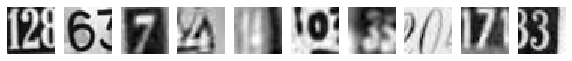

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [0]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

Randomly plotting a value from the test dataset

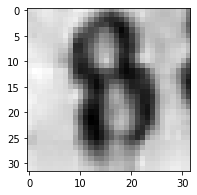

Label:  8


In [0]:
plt.figure(figsize=(3, 3))
plt.imshow(X_test[10], cmap="gray")    
plt.show()
print('Label: ', y_test[10])

Reshaping the 32X32 image to 1024 features

In [0]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

Normalizing the features

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

Converting y data (labels) into categorical (one-hot encoding)

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Printing the shape of the dataset (after one-hot encoding)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10)


Printing the first value of input

In [0]:
X_train[0]

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)

Printing the first value of the label

In [0]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Running a traditional algorithm (KNN Classifier) to predict the image values

In [0]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
knn.score(X_test, y_test)

0.32416666666666666

Here we used the default value for n_neighbours = 5, however let's run it for a few more values to find the optimal value of k (n_neighbours)

In [0]:
#List of values for n_neigbours (k)
neighbours = [3,7,11,15,19,23]
print(neighbours)

[3, 7, 11, 15, 19, 23]


In [0]:
ac_scores = []

for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores = knn.score(X_test, y_test)
    print("K value = {} Accuracy = {}".format(k, scores))
    ac_scores.append(scores)

MSE = [1 - x for x in ac_scores]

optimal_k = neighbours[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

K value = 3 Accuracy = 0.3783888888888889
K value = 7 Accuracy = 0.28683333333333333
K value = 11 Accuracy = 0.23622222222222222
K value = 15 Accuracy = 0.201
K value = 19 Accuracy = 0.17444444444444446
K value = 23 Accuracy = 0.15261111111111111
The optimal number of neighbors is 3


So, traditional Algorithms like KNN appears to be very inefficient for working with datasets like this one. 
Another noteworthy point to be mentioned here, is the algorithm took a long time to run here.
Still the optimal value of K turns out to be 3, so let's try to evaluate the metrics for the same model since those might be useful for comparison with advenced techniques like Neural Networks in the future.

In [9]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_predict = knn.predict(X_test)

Printing the accuracy on Test Set

In [11]:
print(metrics.accuracy_score(y_test, y_predict))

0.3783888888888889


Printing the classification report

In [13]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.61      0.44      0.51      1814
           1       0.62      0.51      0.56      1828
           2       0.74      0.40      0.52      1803
           3       0.56      0.27      0.37      1719
           4       0.78      0.51      0.61      1812
           5       0.58      0.25      0.35      1768
           6       0.54      0.29      0.37      1832
           7       0.80      0.54      0.65      1808
           8       0.45      0.25      0.32      1812
           9       0.60      0.32      0.41      1804

   micro avg       0.64      0.38      0.47     18000
   macro avg       0.63      0.38      0.47     18000
weighted avg       0.63      0.38      0.47     18000
 samples avg       0.38      0.38      0.38     18000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


A remarkable thing to note here is that the execution of KNN is taking a lot of time (about 20 min for the test set with a sepecific value of k).
Now let's try out Neural Networks on this dataset.

Let's start by initializing a simple Neural Network and then change or tune the parameters and hyperparameters for best performance.

In [0]:
model = Sequential()
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 32us/sample - loss: 2.3033 - accuracy: 0.1182
Epoch 2/100
42000/42000 [==============================] - 1s 21us/sample - loss: 2.2908 - accuracy: 0.1313
Epoch 3/100
42000/42000 [==============================] - 1s 20us/sample - loss: 2.2792 - accuracy: 0.1526
Epoch 4/100
42000/42000 [==============================] - 1s 20us/sample - loss: 2.2647 - accuracy: 0.1792
Epoch 5/100
42000/42000 [==============================] - 1s 21us/sample - loss: 2.2482 - accuracy: 0.2059
Epoch 6/100
42000/42000 [==============================] - 1s 20us/sample - loss: 2.2297 - accuracy: 0.2361
Epoch 7/100
42000/42000 [==============================] - 1s 20us/sample - loss: 2.2092 - accuracy: 0.2666
Epoch 8/100
42000/42000 [==============================] - 1s 21us/sample - loss: 2.1860 - accuracy: 0.2890
Epoch 9/100
42000/42000 [==============================] - 1s 20us/sample - loss: 2.1601 - accuracy: 0.3136
Epoch

In [39]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 43us/sample - loss: 0.9892 - accuracy: 0.7128


In [40]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7127778


We got a fair accuracy of 71% by using RELU Activation among other activations. Now let's add a few more layers and see model performance.

In [44]:
model = Sequential()
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 30us/sample - loss: 2.3039 - accuracy: 0.1132
Epoch 2/100
42000/42000 [==============================] - 1s 24us/sample - loss: 2.2927 - accuracy: 0.1391
Epoch 3/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.2850 - accuracy: 0.1534
Epoch 4/100
42000/42000 [==============================] - 1s 24us/sample - loss: 2.2742 - accuracy: 0.1639
Epoch 5/100
42000/42000 [==============================] - 1s 23us/sample - loss: 2.2581 - accuracy: 0.1716
Epoch 6/100
42000/42000 [==============================] - 1s 24us/sample - loss: 2.2376 - accuracy: 0.1886
Epoch 7/100
42000/42000 [==============================] - 1s 25us/sample - loss: 2.2122 - accuracy: 0.2060
Epoch 8/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.1825 - accuracy: 0.2254
Epoch 9/100
42000/42000 [==============================] - 1s 25us/sample - loss: 2.1492 - accuracy: 0.2480
Epoch

In [45]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 46us/sample - loss: 0.8624 - accuracy: 0.7431
Test accuracy:  0.7430556


Three hidden layers seems to be be working good in our case. Let's play around with the number of activation units

In [50]:
model = Sequential()
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 30us/sample - loss: 2.3037 - accuracy: 0.1048
Epoch 2/100
42000/42000 [==============================] - 1s 23us/sample - loss: 2.2953 - accuracy: 0.1122
Epoch 3/100
42000/42000 [==============================] - 1s 23us/sample - loss: 2.2889 - accuracy: 0.1296
Epoch 4/100
42000/42000 [==============================] - 1s 23us/sample - loss: 2.2810 - accuracy: 0.1555
Epoch 5/100
42000/42000 [==============================] - 1s 23us/sample - loss: 2.2705 - accuracy: 0.1777
Epoch 6/100
42000/42000 [==============================] - 1s 23us/sample - loss: 2.2567 - accuracy: 0.2034
Epoch 7/100
42000/42000 [==============================] - 1s 24us/sample - loss: 2.2372 - accuracy: 0.2227
Epoch 8/100
42000/42000 [==============================] - 1s 23us/sample - loss: 2.2109 - accuracy: 0.2421
Epoch 9/100
42000/42000 [==============================] - 1s 23us/sample - loss: 2.1761 - accuracy: 0.2572
Epoch

In [51]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 45us/sample - loss: 0.8621 - accuracy: 0.7479
Test accuracy:  0.74788886


The above combination is working well. Let's proceed with this combination and try diferent weight utilization

In [58]:
model = Sequential()
model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(40, kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(30, kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer='he_uniform'))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 32us/sample - loss: 2.2989 - accuracy: 0.1138
Epoch 2/100
42000/42000 [==============================] - 1s 23us/sample - loss: 2.2738 - accuracy: 0.1418
Epoch 3/100
42000/42000 [==============================] - 1s 23us/sample - loss: 2.2423 - accuracy: 0.1750
Epoch 4/100
42000/42000 [==============================] - 1s 23us/sample - loss: 2.1956 - accuracy: 0.2059
Epoch 5/100
42000/42000 [==============================] - 1s 24us/sample - loss: 2.1360 - accuracy: 0.2404
Epoch 6/100
42000/42000 [==============================] - 1s 24us/sample - loss: 2.0662 - accuracy: 0.2747
Epoch 7/100
42000/42000 [==============================] - 1s 23us/sample - loss: 1.9885 - accuracy: 0.3072
Epoch 8/100
42000/42000 [==============================] - 1s 23us/sample - loss: 1.9132 - accuracy: 0.3363
Epoch 9/100
42000/42000 [==============================] - 1s 24us/sample - loss: 1.8478 - accuracy: 0.3629
Epoch

In [59]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 48us/sample - loss: 0.8228 - accuracy: 0.7546
Test accuracy:  0.75461113


Wight initialization with He-Uniform worked really well. Now let's add Batch Normalization

In [64]:
model = Sequential()
model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(40, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(30, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer='he_uniform'))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 46us/sample - loss: 2.3043 - accuracy: 0.1666
Epoch 2/100
42000/42000 [==============================] - 1s 28us/sample - loss: 2.0202 - accuracy: 0.2904
Epoch 3/100
42000/42000 [==============================] - 1s 28us/sample - loss: 1.8063 - accuracy: 0.3973
Epoch 4/100
42000/42000 [==============================] - 1s 27us/sample - loss: 1.6145 - accuracy: 0.4877
Epoch 5/100
42000/42000 [==============================] - 1s 26us/sample - loss: 1.4588 - accuracy: 0.5541
Epoch 6/100
42000/42000 [==============================] - 1s 26us/sample - loss: 1.3435 - accuracy: 0.5976
Epoch 7/100
42000/42000 [==============================] - 1s 27us/sample - loss: 1.2521 - accuracy: 0.6284
Epoch 8/100
42000/42000 [==============================] - 1s 29us/sample - loss: 1.1756 - accuracy: 0.6512
Epoch 9/100
42000/42000 [==============================] - 1s 27us/sample - loss: 1.1168 - accuracy: 0.6695
Epoch

In [65]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 58us/sample - loss: 0.7555 - accuracy: 0.7818
Test accuracy:  0.7817778


Batch Normalization boosted the accuracy a lot. Let's check if tuning Optimizer and learning rate can add further.

In [96]:
model = Sequential()
model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(40, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(30, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer='he_uniform'))
model.add(Activation('softmax'))

sgd = optimizers.Adam(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 47us/sample - loss: 1.6311 - accuracy: 0.4295
Epoch 2/100
42000/42000 [==============================] - 1s 27us/sample - loss: 1.0565 - accuracy: 0.6605
Epoch 3/100
42000/42000 [==============================] - 1s 27us/sample - loss: 0.8983 - accuracy: 0.7149
Epoch 4/100
42000/42000 [==============================] - 1s 27us/sample - loss: 0.8216 - accuracy: 0.7413
Epoch 5/100
42000/42000 [==============================] - 1s 26us/sample - loss: 0.7563 - accuracy: 0.7611
Epoch 6/100
42000/42000 [==============================] - 1s 26us/sample - loss: 0.7299 - accuracy: 0.7708
Epoch 7/100
42000/42000 [==============================] - 1s 28us/sample - loss: 0.6970 - accuracy: 0.7813
Epoch 8/100
42000/42000 [==============================] - 1s 28us/sample - loss: 0.6722 - accuracy: 0.7890
Epoch 9/100
42000/42000 [==============================] - 1s 27us/sample - loss: 0.6580 - accuracy: 0.7936
Epoch

In [83]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 54us/sample - loss: 0.8052 - accuracy: 0.7792
Test accuracy:  0.77916664


Let's the prediction vs actual for a random data in test set

In [0]:
y_predict = model.predict(X_test)

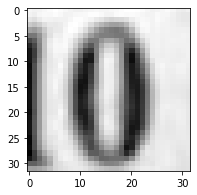

Label:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [124]:
X_test_plt = X_test.reshape(X_test.shape[0], 32,32)
plt.figure(figsize=(3, 3))
plt.imshow(X_test_plt[968], cmap="gray")    
plt.show()
print('Label: ', y_test[968])

In [122]:
y_predict[968]

array([1.0000000e+00, 5.1972846e-11, 5.8658614e-16, 3.2799264e-14,
       2.8898500e-12, 2.3565907e-15, 1.0591713e-09, 4.5593286e-12,
       3.0892105e-13, 2.1719824e-08], dtype=float32)

Conclusion: For this dataset, traditional approach like KNN seemed very ineffective in terms of prediction as well as performance. 
It took 20 mins for KNN to run for a specific k while all Neural Networks ran within 1-2 min. The accuracy in KNN was around 35-40% for the test set while for Neural Networks it went to close to 80% for the test data set. So, we can conclude here that Neural Networks are more suited for datasets like SVHN datasets.